In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import user_load_util

In [2]:
# Load the CSV file into a DataFrame
file_path = 'C:/Users/Atakan/Downloads/seminar_files (5)/seminar_files/anonymized_user_profile.csv'
df = pd.read_csv(file_path)

In [19]:
# Create question map
question_map = (user_data['question'].groupby('question_id')
                .apply(lambda group: {'question': group['question'].iloc[0],
                                      'choices': group['choices'].iloc[0]
                                      })
                .to_dict())

C:\Users\Atakan\AppData\Local\Temp\ipykernel_23460\329468339.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: {'question': group['question'].iloc[0],


In [20]:
# Calculate the BMI and add it as a new column
df['bmi'] = df['weight'] / (df['height'] ** 2)

# Save the updated DataFrame back to a CSV file (optional)
output_file_path = 'C:/Users/Atakan/Downloads/seminar_files (5)/seminar_files/anonymized_user_profile.csv'
df.to_csv(output_file_path, index=False)

print(f"Updated DataFrame saved to {output_file_path}")

Updated DataFrame saved to C:/Users/Atakan/Downloads/seminar_files (5)/seminar_files/anonymized_user_profile.csv


In [21]:
user_location = 'C:/Users/Atakan/Downloads/seminar_files (5)/seminar_files'
user_data = user_load_util.load_user_data(user_location)


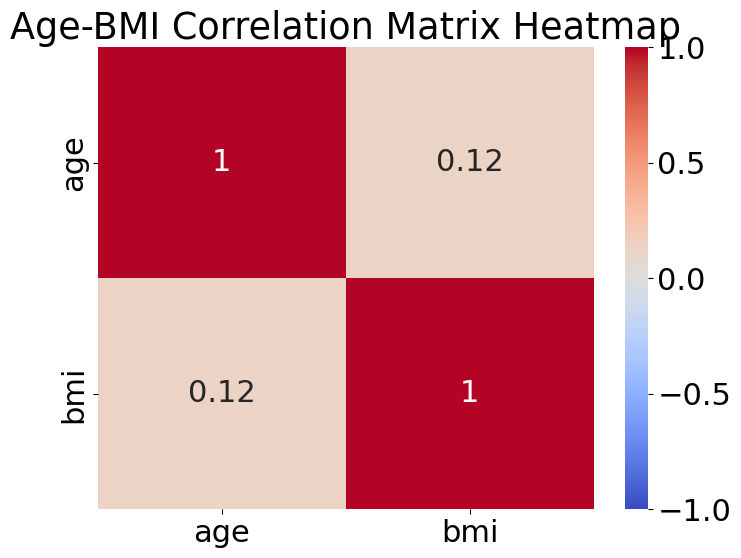

In [22]:
file_path = 'C:/Users/Atakan/Downloads/seminar_files (5)/seminar_files/anonymized_user_profile.csv'
data = pd.read_csv(file_path)



# Calculate the correlation matrix for 'age' and 'bmi'
correlation_matrix = data[['age', 'bmi',]].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Age-BMI Correlation Matrix Heatmap')
plt.show()

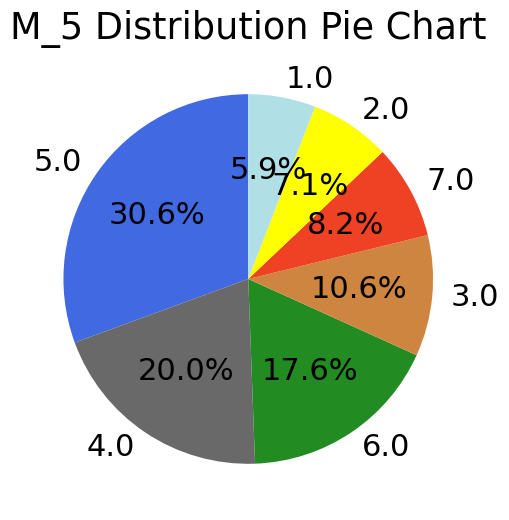

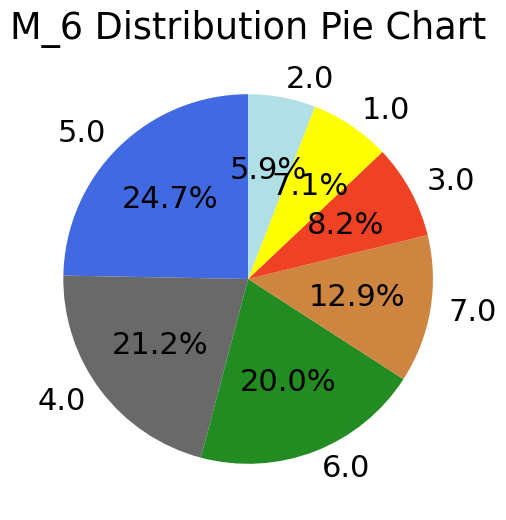

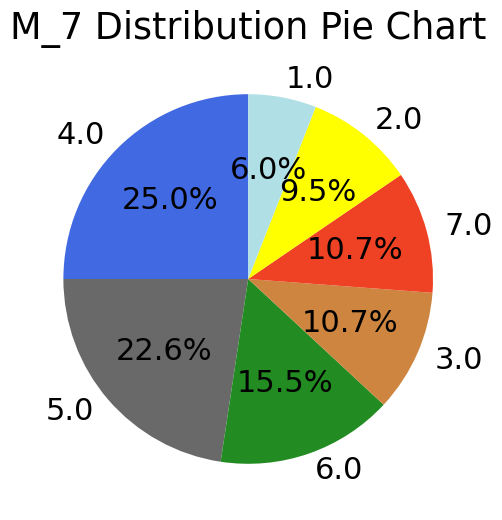

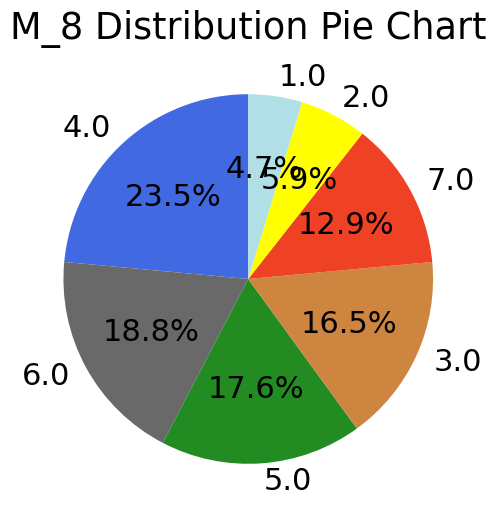

In [23]:
user_additional_df = user_data['user_additional_profile']
M5_Score = user_additional_df['M_5'].value_counts()
M6_Score = user_additional_df['M_6'].value_counts()
M7_Score = user_additional_df['M_7'].value_counts()
M8_Score = user_additional_df['M_8'].value_counts()


colors = {'1': '#4169E1', '2': '#696969', '3': '#228B22', '4': '#CD853F', '5': '#EF4123', '6': '#FFFF00', '7': '#B0E0E6'}

# Plot the distribution as pie chart
plt.figure(figsize=(9, 6))
plt.pie(x=M5_Score.values, labels=M5_Score.index, autopct='%1.1f%%',
        startangle=90, colors=colors.values())
plt.title('M_5 Distribution Pie Chart')
plt.show()

plt.figure(figsize=(9, 6))
plt.pie(x=M6_Score.values, labels=M6_Score.index, autopct='%1.1f%%',
        startangle=90, colors=colors.values())
plt.title('M_6 Distribution Pie Chart')
plt.show()

plt.figure(figsize=(9, 6))
plt.pie(x=M7_Score.values, labels=M7_Score.index, autopct='%1.1f%%',
        startangle=90, colors=colors.values())
plt.title('M_7 Distribution Pie Chart')
plt.show()

plt.figure(figsize=(9, 6))
plt.pie(x=M8_Score.values, labels=M8_Score.index, autopct='%1.1f%%',
        startangle=90, colors=colors.values())
plt.title('M_8 Distribution Pie Chart')
plt.show()




In [24]:
user_df = user_data['user_additional_profile']

categories = {'M_1':'Motivation1', 'M_2':'Motivation2','M_3':'Motivation3','M_4':'Motivation4'}

for question_id, description in categories.items():
    mapped_data = user_df[question_id].map(question_map[category]['choices']).value_counts()
    plt.figure(figsize=(18, 10))
    sns.histplot(mapped_data, kde=False)
    sns.barplot(x=mapped_data.index, y=mapped_data.values,color='skyblue')
    plt.xlabel(description)
    plt.ylabel('Total Piece')
    plt.title('Intrinsic Motivation - {}'.format(description))
    plt.show()

NameError: name 'category' is not defined

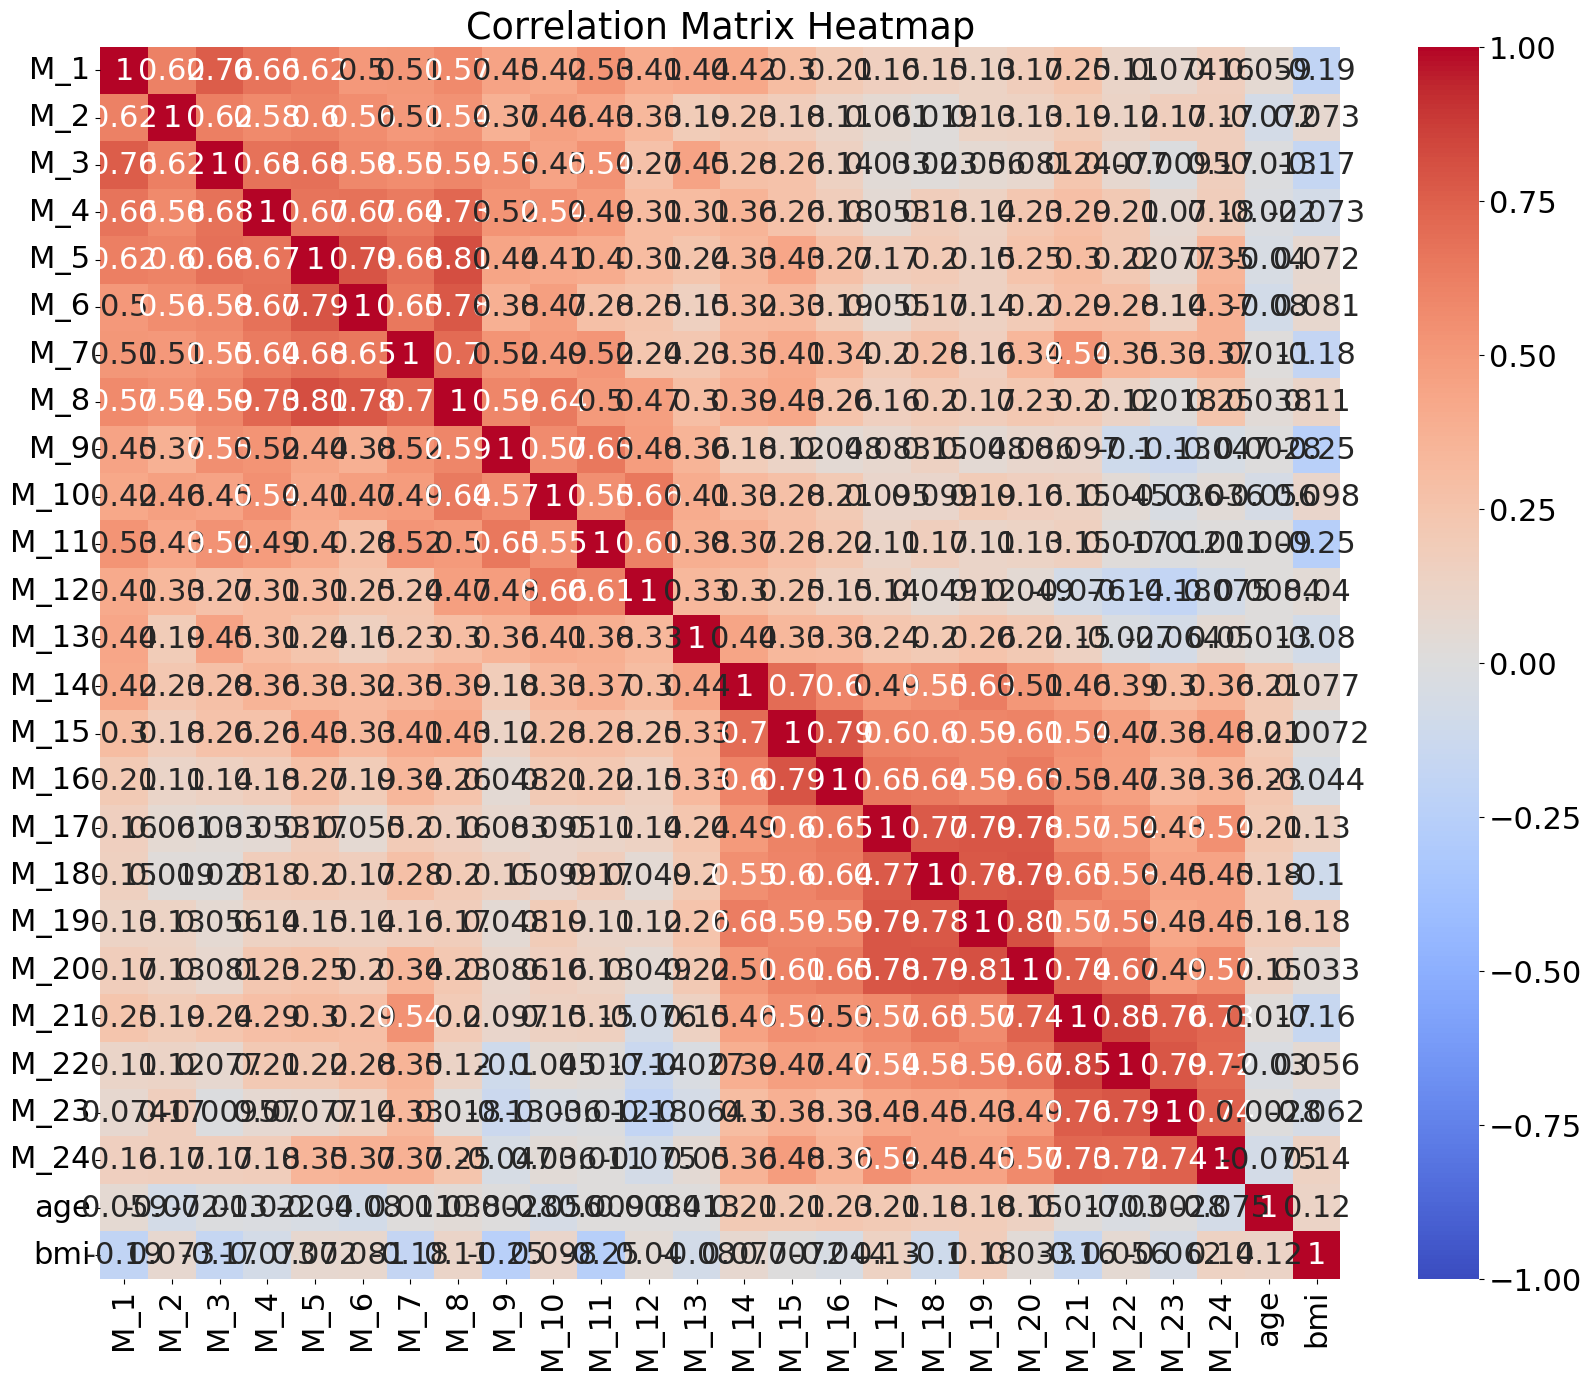

In [25]:
# CSV dosyalarının yollarını belirtin
anonymized_user_path = 'C:/Users/Atakan/Downloads/seminar_files (5)/seminar_files/anonymized_user_profile.csv'
user_additional_path = 'C:/Users/Atakan/Downloads/seminar_files (5)/seminar_files/user_additional_profile.csv'

# CSV dosyalarını oku
anonymized = pd.read_csv(anonymized_user_path)
user_additional = pd.read_csv(user_additional_path)

m_columns = [f'M_{i}' for i in range(1, 25)]


# DataFrame'leri birleştirin (common key 'user_id' olarak varsayılmıştır)
merged_df = pd.merge(user_additional[['user_id'] + m_columns], 
                     anonymized[['user_id', 'age', 'bmi']], 
                     on='user_id', how='inner')
# 'user_id' sütununu çıkar
merged_df_without_userid = merged_df.drop('user_id', axis=1)

# Korelasyon matrisini hesapla
correlation_matrix = merged_df_without_userid.corr()

# Korelasyon matrisinin ısı haritasını oluştur
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

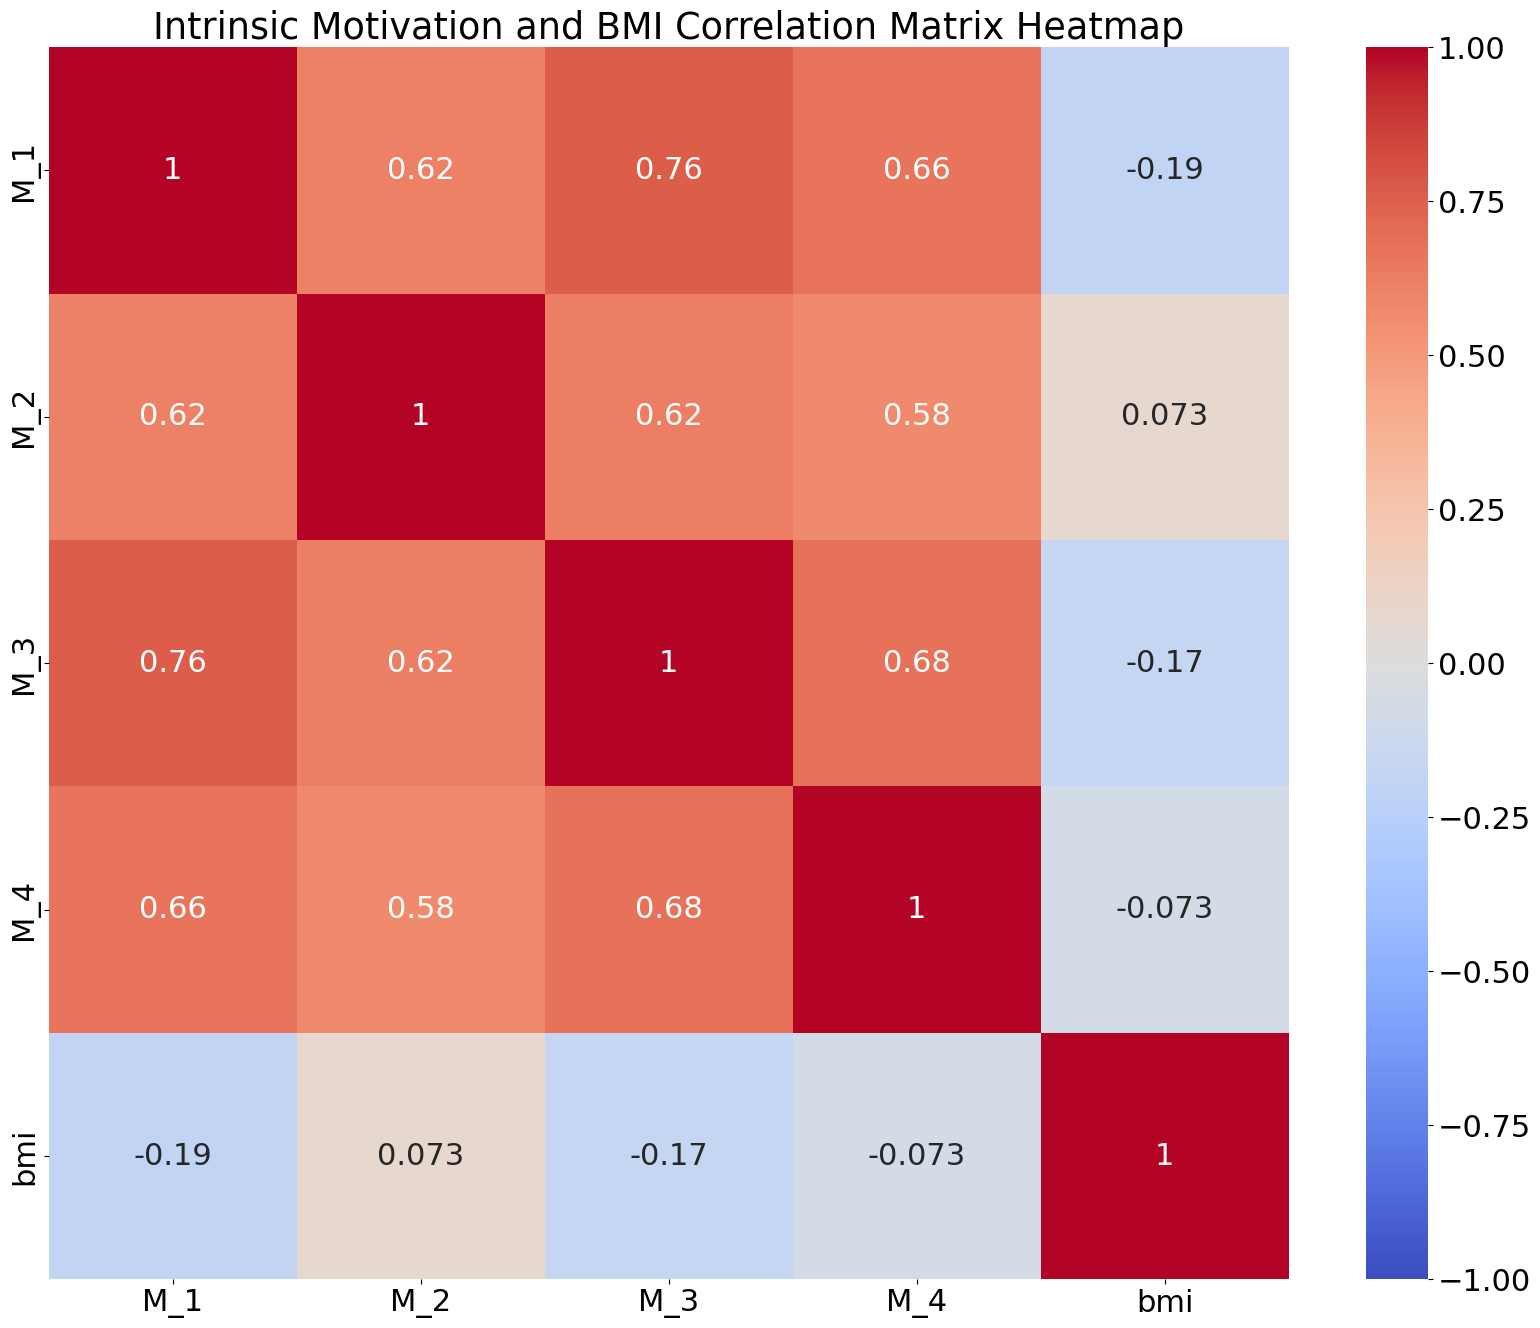

<Figure size 640x480 with 0 Axes>

In [13]:
# CSV dosyalarının yollarını belirtin
anonymized_user_path = 'C:/Users/Atakan/Downloads/seminar_files (5)/seminar_files/anonymized_user_profile.csv'
user_additional_path = 'C:/Users/Atakan/Downloads/seminar_files (5)/seminar_files/user_additional_profile.csv'

# CSV dosyalarını oku
anonymized = pd.read_csv(anonymized_user_path)
user_additional = pd.read_csv(user_additional_path)

m_columns = [f'M_{i}' for i in range(1, 5)]


# DataFrame'leri birleştirin (common key 'user_id' olarak varsayılmıştır)
merged_df = pd.merge(user_additional[['user_id'] + m_columns], 
                     anonymized[['user_id', 'bmi']], 
                     on='user_id', how='inner')
# 'user_id' sütununu çıkar
merged_df_without_userid = merged_df.drop('user_id', axis=1)

# Korelasyon matrisini hesapla
correlation_matrix = merged_df_without_userid.corr()

# Korelasyon matrisinin ısı haritasını oluştur
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Intrinsic Motivation and BMI Correlation Matrix Heatmap')
plt.show()
plt.savefig('output.png', dpi=300, bbox_inches='tight')

In [14]:
import pandas as pd
import scipy.stats as stats

df1 = pd.read_csv('anonymized_user_profile.csv')
df2 = pd.read_csv('user_additional_profile.csv')

m_columns = [f'M_{i}' for i in range(21, 25)]
bmi = df1['bmi']

df2_cleaned = df2.dropna(subset=m_columns)
bmi_cleaned = bmi.dropna()

df_combined = df2_cleaned.join(bmi_cleaned, how='inner')

print("Relation between Amotivation and BMI")

for col in m_columns:
    correlation, p_value = stats.spearmanr(df_combined[col], df_combined['bmi'])
    print(f"Spearman correlation coefficient ({col} and BMI): {correlation}")
    print(f"P-value: {p_value}")
    print()

Relation between Amotivation and BMI
Spearman correlation coefficient (M_21 and BMI): 0.13725088216978815
P-value: 0.23080923716591883

Spearman correlation coefficient (M_22 and BMI): 0.15029727507577484
P-value: 0.18903692174299774

Spearman correlation coefficient (M_23 and BMI): 0.19785522390901503
P-value: 0.08249167333024023

Spearman correlation coefficient (M_24 and BMI): 0.1856816547886621
P-value: 0.10360810697151027



In [ ]:
import pandas as pd
from scipy.stats import pearsonr
df = pd.read_csv('anonymized_user_profile.csv')

age = df['age']
bmi = df['bmi']

df_clean = df.dropna(subset=['age', 'bmi'])

age_clean = df_clean['age']
bmi_clean = df_clean['bmi']

correlation, p_value = pearsonr(age_clean, bmi_clean)

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

In [18]:
import pandas as pd
import scipy.stats as stats

# Read CSV file
df = pd.read_csv('anonymized_user_profile.csv')
data = pd.read_csv('user_additional_profile.csv')

m_columns = [f'M_{i}' for i in range(1, 5)]

# Clean NaN values
df = df.dropna(subset=[m_columns, 'bmi'])

# Take 'age' and 'bmi'
M_1 = m_columns
bmi = df['bmi']

M_1 = m_columns
m_columns = ['M_1', 'M_2', 'M_3', 'M_4']

# Pearson korelasyonu için her bir sütun ile 'bmi' arasındaki ilişkiyi inceleyelim
for col in m_columns:
    correlation, p_value = stats.pearsonr(df[col], df['bmi'])
    print(f"Pearson korelasyon katsayısı ({col} ile bmi): {correlation}")
    print(f"P-değeri: {p_value}")
    print()

TypeError: unhashable type: 'list'